In [ ]:
# Mount Google Drive if you're using files from there
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas matplotlib statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def load_data(file_path):
    df = pd.read_csv(file_path, parse_dates=['Date'])
    return df

def preprocess_data(df):
    df.fillna(method='ffill', inplace=True)
    df = df[(np.abs(df['Price'] - df['Price'].mean()) <= (3 * df['Price'].std()))]
    return df

brent_data = load_data('/content/drive/My Drive/Kifiya/week 10/BrentOilPrices.csv')

economic_data = load_data('/content/drive/My Drive/Kifiya/week 10/Rates.csv')

# brent_data = preprocess_data()


<ipython-input-4-d118c30de67a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'])


In [ ]:
economic_data.head(5)

,Date,GDP per cap (annual %),inflation,Unemployr,exchange rate
0,1990-01-01,-0.882677,5.152481,NaN,2.0700
1,1991-01-01,-10.967014,35.722598,3.259,2.0700
2,1992-01-01,-12.314452,10.527444,3.382,2.8025
3,1993-01-01,9.398619,3.543066,3.236,5.0000
4,1994-01-01,-0.202451,7.593876,3.100,5.4650


In [ ]:
brent_data.head(5)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
import pandas as pd

# Check the original data
print("Original Brent Data:")
print(brent_data.head())

# Convert the 'Date' column to datetime format with error handling
brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce', dayfirst=True)

# Check for any dates that couldn't be converted
if brent_data['Date'].isnull().any():
    print("Warning: Some dates could not be converted:")
    print(brent_data[brent_data['Date'].isnull()])

# Extract the year from the 'Date' column
brent_data['Year'] = brent_data['Date'].dt.year

# Calculate the average price per year
brent_data = brent_data.groupby('Year')['Price'].mean().reset_index()

# Rename columns to keep 'Date' and 'Price' as the output columns
brent_data.columns = ['Date', 'Price']

# Convert the 'Date' column back to string if you want to maintain it as 'YYYY' format
brent_data['Date'] = brent_data['Date'].astype(str)

# Print the resulting DataFrame
print("\nAverage Brent Oil Price per Year:")
print(brent_data)



Original Brent Data:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

Average Brent Oil Price per Year:
    Date       Price
0   1987   18.525813
1   1988   14.905412
2   1989   18.228228
3   1990   23.761445
4   1991   20.041128
5   1992   19.319728
6   1993   17.013413
7   1994   15.856389
8   1995   17.015850
9   1996   20.639803
10  1997   19.108508
11  1998   12.758103
12  1999   17.901566
13  2000   28.660672
14  2001   24.455720
15  2002   24.993255
16  2003   28.850814
17  2004   38.259693
18  2005   54.574553
19  2006   65.161765
20  2007   72.441160
21  2008   96.944348
22  2009   61.738770
23  2010   79.609444
24  2011  111.264274
25  2012  111.570683
26  2013  108.555000
27  2014   98.969606
28  2015   52.316549
29  2016   43.638000
30  2017   54.124805
31  2018   71.335000
32  2019   64.319845
33  2020   42.101016
34  2021   70.855336
35  2022  103.477545


In [ ]:
brent_data.head(4)

,Date,Price
0,1987,18.525813
1,1988,14.905412
2,1989,18.228228
3,1990,23.761445


In [ ]:
# Step 1: Convert the 'Date' in economic_data to datetime format and extract the year
economic_data['Date'] = pd.to_datetime(economic_data['Date'])
economic_data['Year'] = economic_data['Date'].dt.year.astype(int)  # Ensure 'Year' is an integer

brent_data['Date'] = brent_data['Date'].astype(int)  # Convert 'Date' to integer if not already

merged_data = pd.merge(economic_data, brent_data, left_on='Year', right_on='Date', how='left')

merged_data.drop(columns=['Date_x', 'Date_y'], inplace=True)

# Rename 'Year' back to 'Date'
merged_data.rename(columns={'Year': 'Date'}, inplace=True)

# Print the merged DataFrame
print("\nMerged Data:")
print(merged_data)

# Save the merged DataFrame to a CSV file
output_file_path = '/content/drive/My Drive/Kifiya/week 10/Merged_Data.csv'
merged_data.to_csv(output_file_path, index=False)

print(f"\nMerged data saved to {output_file_path}.")


Merged Data:
    GDP per cap (annual %)  inflation   Unemployr  exchange rate  Date  \
0                -0.882677    5.152481        NaN       2.070000  1990   
1               -10.967014   35.722598      3.259       2.070000  1991   
2               -12.314452   10.527444      3.382       2.802500  1992   
3                 9.398619    3.543066      3.236       5.000000  1993   
4                -0.202451    7.593876      3.100       5.465000  1994   
5                 2.699901   10.022173      3.021       6.158333  1995   
6                 8.881601   -8.484249      3.137       6.351675  1996   
7                -0.042348    2.395210      3.245       6.709342  1997   
8                -6.368032    0.894802      3.489       7.115908  1998   
9                 2.025447    7.941449      3.714       7.942250  1999   
10                2.980694    0.662458      3.502       8.217258  2000   
11                5.183296   -8.237845      3.174       8.457492  2001   
12               -1.4194

In [ ]:
merged_data = merged_data.dropna()

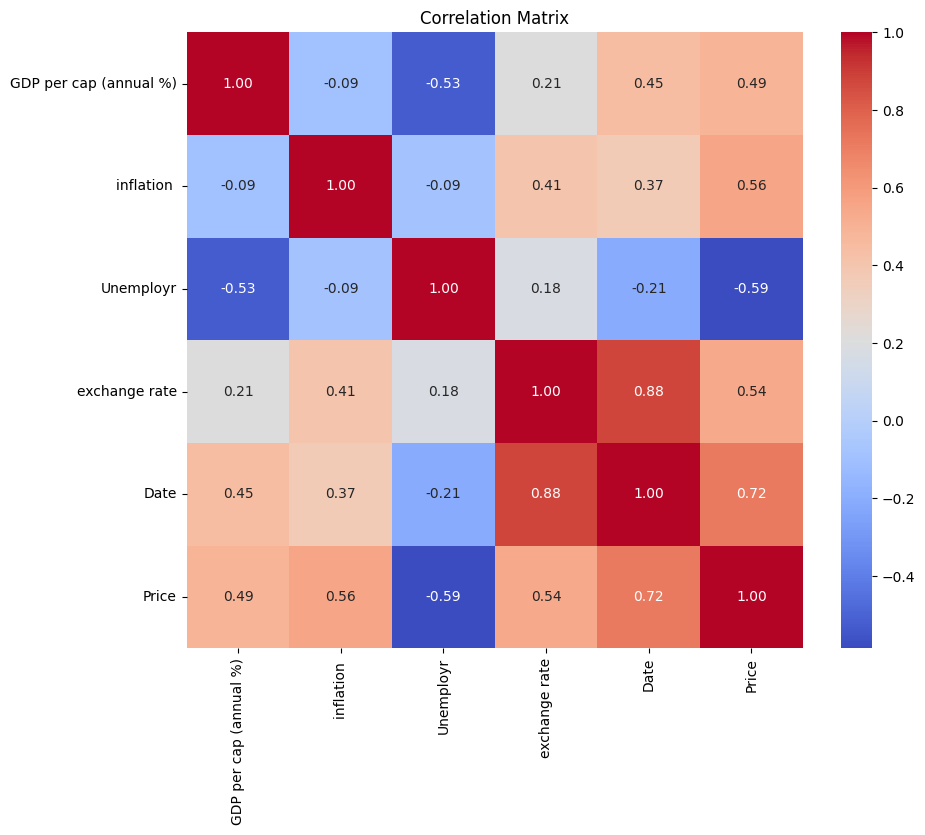

In [ ]:
# Calculate correlation matrix
correlation_matrix = merged_data.corr()

# Plot heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create lagged GDP column
merged_data['gdp_lagged'] = merged_data['GDP per cap (annual %)'].shift(1)

# Calculate the correlation between lagged GDP and Price
lagged_correlation = merged_data['Price'].corr(merged_data['gdp_lagged'])

# Print the result
print(f"Lagged correlation between Price and Lagged GDP: {lagged_correlation:.2f}")


Lagged correlation between Price and Lagged GDP: 0.51


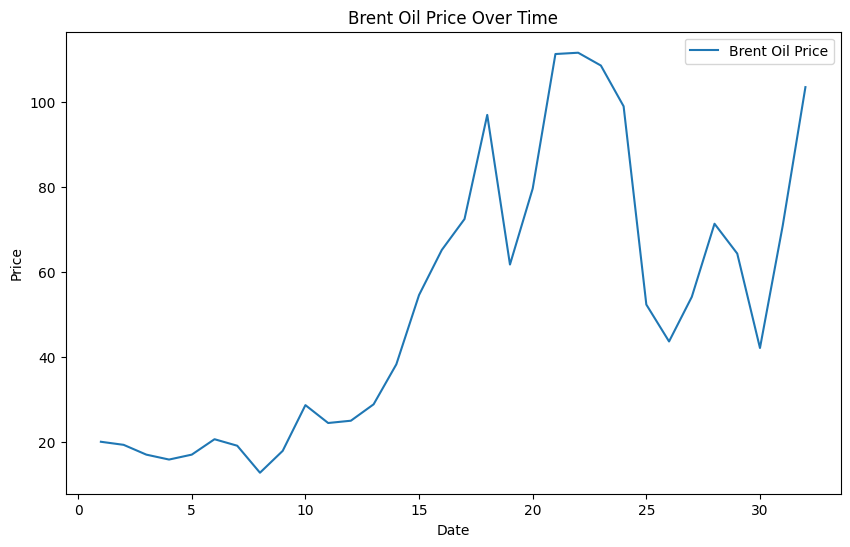

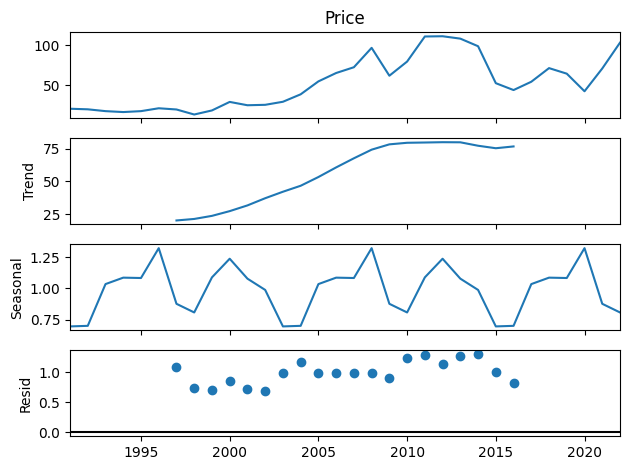

ADF Statistic: -1.2160404780008944
p-value: 0.6666577220648062
The series is not stationary.


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def plot_time_series(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Price'], label='Brent Oil Price')
    plt.title('Brent Oil Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def decompose_series(df, period=12):
    # Ensure that the 'Date' column is set as the index
    df.set_index('Date', inplace=True)

    # Check for missing values and drop them
    df = df.dropna(subset=['Price'])

    # Decompose the series
    decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=period)
    decomposition.plot()
    plt.show()

def adf_test(df):
    result = adfuller(df['Price'].dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Make sure merged_data is available and contains 'Date' and 'Price' columns
plot_time_series(merged_data)
decompose_series(merged_data)
adf_test(merged_data)


In [ ]:
merged_data.head(5)

,GDP per cap (annual %),inflation,Unemployr,exchange rate,Price,gdp_lagged
Date,,,,,,
1991,-10.967014,35.722598,3.259,2.070000,20.041128,NaN
1992,-12.314452,10.527444,3.382,2.802500,19.319728,-10.967014
1993,9.398619,3.543066,3.236,5.000000,17.013413,-12.314452
1994,-0.202451,7.593876,3.100,5.465000,15.856389,9.398619
1995,2.699901,10.022173,3.021,6.158333,17.015850,-0.202451


First few rows of merged_data:
            GDP per cap (annual %)  inflation   Unemployr  exchange rate  \
Date                                                                       
1991-01-01              -10.967014   35.722598      3.259       2.070000   
1992-01-01              -12.314452   10.527444      3.382       2.802500   
1993-01-01                9.398619    3.543066      3.236       5.000000   
1994-01-01               -0.202451    7.593876      3.100       5.465000   
1995-01-01                2.699901   10.022173      3.021       6.158333   

                Price  gdp_lagged  
Date                               
1991-01-01  20.041128         NaN  
1992-01-01  19.319728  -10.967014  
1993-01-01  17.013413  -12.314452  
1994-01-01  15.856389    9.398619  
1995-01-01  17.015850   -0.202451  
Shape of merged_data before processing: (32, 6)
Checking for NaN values in merged_data...
GDP per cap (annual %)    0
inflation                 0
Unemployr                 0
exchange r

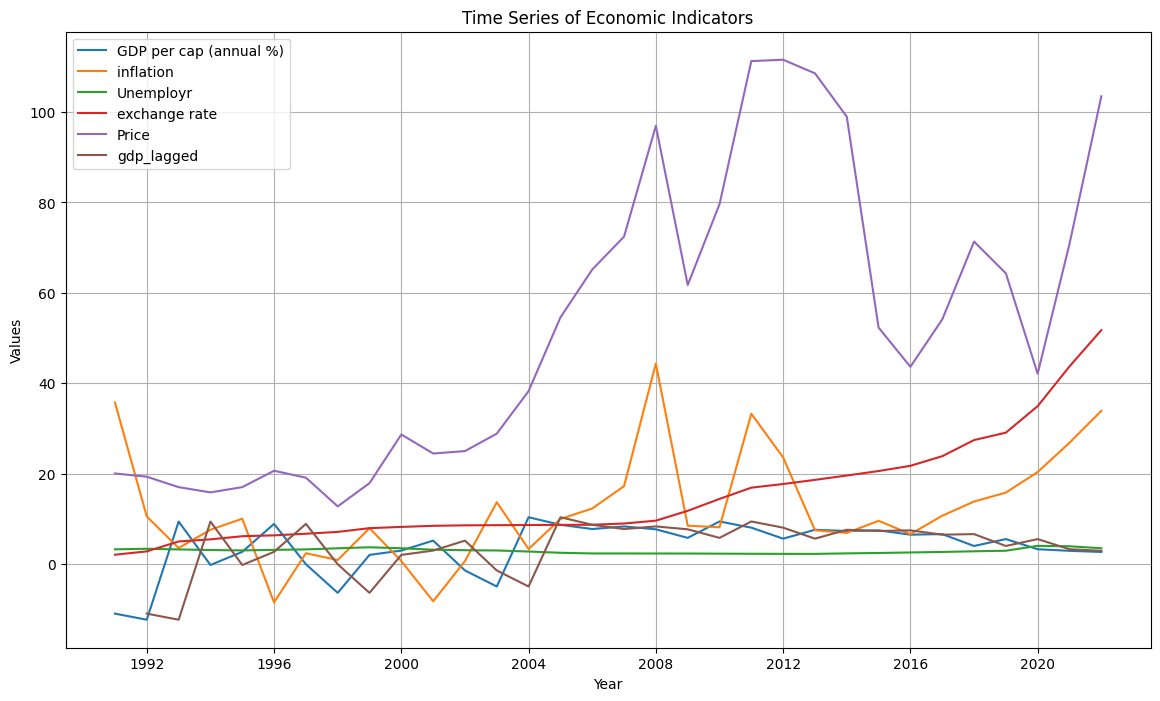

<ipython-input-16-744e5022fb19>:83: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=merged_data.index[-1].to_timestamp() + pd.DateOffset(1), periods=steps, freq='Y')


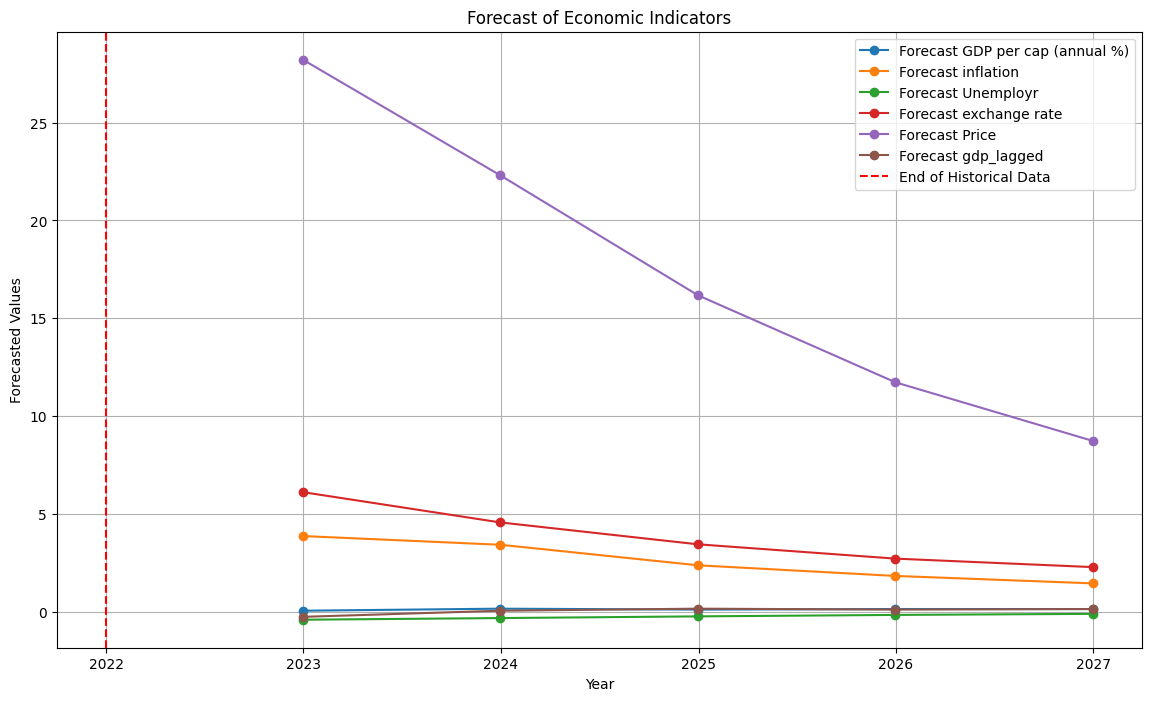

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your merged_data is defined and structured correctly
# Assuming merged_data is already defined and properly set with Date as the index.

merged_data.index = pd.to_datetime(merged_data.index.astype(str), format='%Y')

def prepare_data_for_var(merged_data):
    print("Shape of merged_data before processing:", merged_data.shape)

    if not isinstance(merged_data.index, pd.DatetimeIndex):
        raise KeyError("The dataset must have a DatetimeIndex as the index.")

    # Ensure the index is in the right frequency, usually yearly
    merged_data.index = merged_data.index.to_period('Y')

    print("Checking for NaN values in merged_data...")
    print(merged_data.isnull().sum())

    merged_data = merged_data.dropna()
    print("Shape of merged_data after dropping NaNs:", merged_data.shape)

    merged_data_diff = merged_data.diff().dropna()
    print("Shape of merged_data_diff:", merged_data_diff.shape)

    if merged_data_diff.shape[0] < 5:
        raise ValueError("Not enough observations after differencing to fit the VAR model.")

    return merged_data_diff

def fit_var_model(merged_data_diff, maxlags=2):
    model = VAR(merged_data_diff)

    n_obs = merged_data_diff.shape[0]
    n_eqs = merged_data_diff.shape[1]

    if maxlags >= n_obs:
        raise ValueError("maxlags must be less than the number of observations.")

    var_result = model.fit(maxlags=maxlags, ic='aic')
    print(var_result.summary())
    return var_result

def forecast_var(var_result, steps=5):
    last_observations = var_result.model.endog[-var_result.k_ar:]
    forecast = var_result.forecast(last_observations, steps=steps)
    print("Forecast:\n", forecast)
    return forecast

# Example usage
try:
    # Load or prepare merged_data DataFrame with Date as the DatetimeIndex
    print("First few rows of merged_data:")
    print(merged_data.head())

    # Prepare the data for VAR model
    merged_data_diff = prepare_data_for_var(merged_data)
    # Fit the VAR model
    var_result = fit_var_model(merged_data_diff)

    # Define the number of steps for forecasting
    steps = 5  # Make sure to define steps before using it
    # Get the forecast
    forecast = forecast_var(var_result, steps=steps)

    # Visualization Code
    # Time Series Plot
    plt.figure(figsize=(14, 8))
    for col in merged_data.columns:
        plt.plot(merged_data.index.to_timestamp(), merged_data[col], label=col)  # Convert Period to Timestamp for plotting
    plt.title('Time Series of Economic Indicators')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    plt.show()

    # Forecast Plot
    forecast_df = pd.DataFrame(forecast, columns=merged_data.columns[-len(forecast[0]):])  # Adjust for your variable names
    forecast_index = pd.date_range(start=merged_data.index[-1].to_timestamp() + pd.DateOffset(1), periods=steps, freq='Y')

    plt.figure(figsize=(14, 8))
    for col in forecast_df.columns:
        plt.plot(forecast_index, forecast_df[col], label=f'Forecast {col}', marker='o')
    plt.title('Forecast of Economic Indicators')
    plt.xlabel('Year')
    plt.ylabel('Forecasted Values')
    plt.axvline(x=merged_data.index[-1].to_timestamp(), color='red', linestyle='--', label='End of Historical Data')
    plt.legend()
    plt.grid()
    plt.show()

except KeyError as e:
    print("KeyError encountered:", e)
except ValueError as e:
    print("ValueError encountered:", e)
except Exception as e:
    print("An unexpected error occurred:", e)


First few rows of merged_data:
            GDP per cap (annual %)  inflation   Unemployr  exchange rate  \
Date                                                                       
1991-01-01              -10.967014   35.722598      3.259       2.070000   
1992-01-01              -12.314452   10.527444      3.382       2.802500   
1993-01-01                9.398619    3.543066      3.236       5.000000   
1994-01-01               -0.202451    7.593876      3.100       5.465000   
1995-01-01                2.699901   10.022173      3.021       6.158333   

                Price  gdp_lagged  
Date                               
1991-01-01  20.041128         NaN  
1992-01-01  19.319728  -10.967014  
1993-01-01  17.013413  -12.314452  
1994-01-01  15.856389    9.398619  
1995-01-01  17.015850   -0.202451  
Shape of merged_data before processing: (32, 6)
Checking for NaN values in merged_data...
GDP per cap (annual %)    0
inflation                 0
Unemployr                 0
exchange r

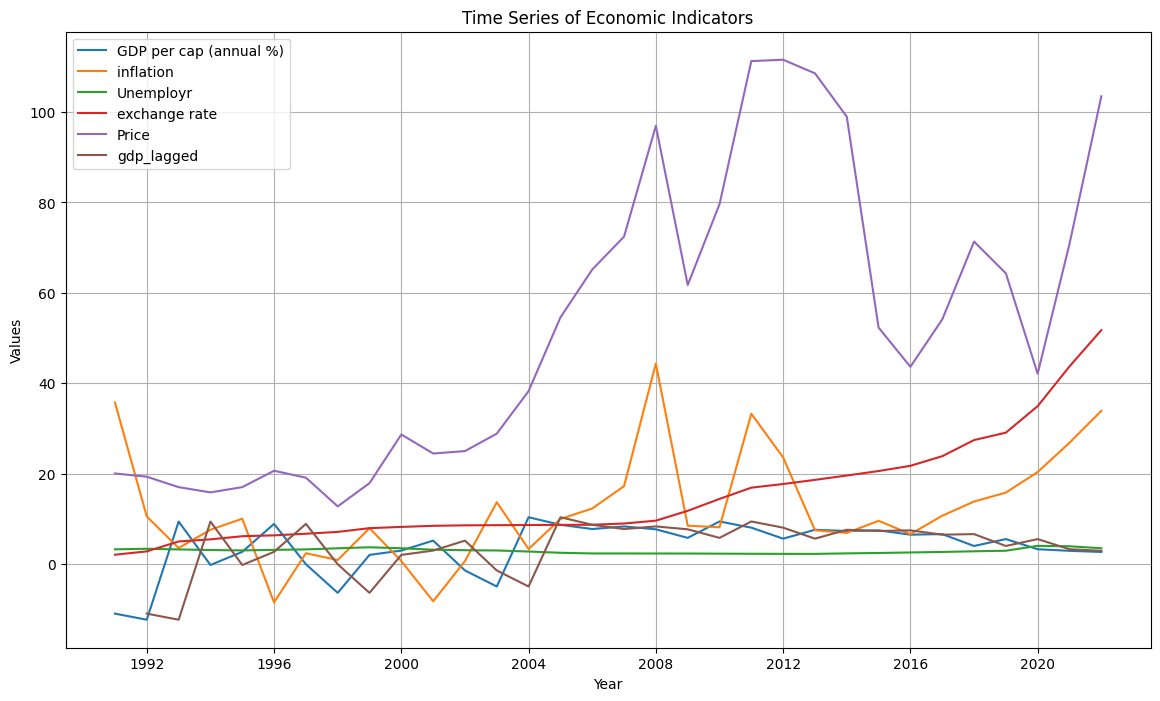

<ipython-input-17-07bf8ba79c56>:86: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=merged_data.index[-1].to_timestamp() + pd.DateOffset(1), periods=steps, freq='Y')


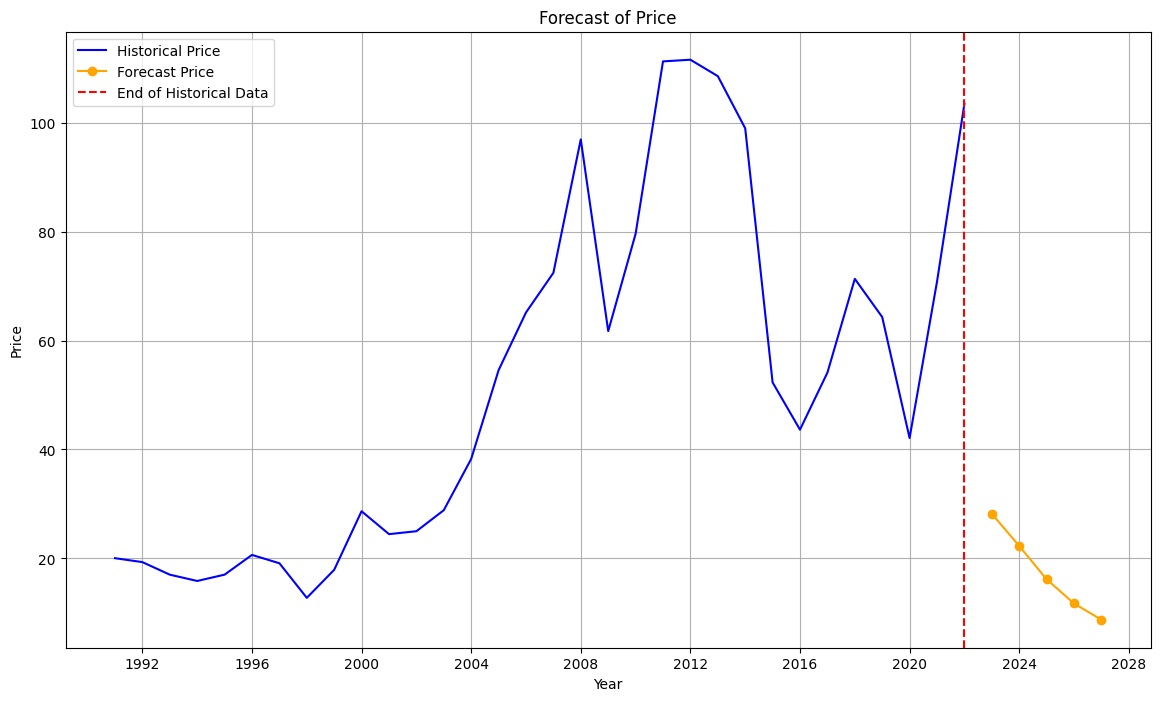

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your merged_data is defined and structured correctly
# Assuming merged_data is already defined and properly set with Date as the index.

merged_data.index = pd.to_datetime(merged_data.index.astype(str), format='%Y')

def prepare_data_for_var(merged_data):
    print("Shape of merged_data before processing:", merged_data.shape)

    if not isinstance(merged_data.index, pd.DatetimeIndex):
        raise KeyError("The dataset must have a DatetimeIndex as the index.")

    # Ensure the index is in the right frequency, usually yearly
    merged_data.index = merged_data.index.to_period('Y')

    print("Checking for NaN values in merged_data...")
    print(merged_data.isnull().sum())

    merged_data = merged_data.dropna()
    print("Shape of merged_data after dropping NaNs:", merged_data.shape)

    merged_data_diff = merged_data.diff().dropna()
    print("Shape of merged_data_diff:", merged_data_diff.shape)

    if merged_data_diff.shape[0] < 5:
        raise ValueError("Not enough observations after differencing to fit the VAR model.")

    return merged_data_diff

def fit_var_model(merged_data_diff, maxlags=2):
    model = VAR(merged_data_diff)

    n_obs = merged_data_diff.shape[0]
    n_eqs = merged_data_diff.shape[1]

    if maxlags >= n_obs:
        raise ValueError("maxlags must be less than the number of observations.")

    var_result = model.fit(maxlags=maxlags, ic='aic')
    print(var_result.summary())
    return var_result

def forecast_var(var_result, steps=5):
    last_observations = var_result.model.endog[-var_result.k_ar:]
    forecast = var_result.forecast(last_observations, steps=steps)
    print("Forecast:\n", forecast)
    return forecast

# Example usage
try:
    # Load or prepare merged_data DataFrame with Date as the DatetimeIndex
    print("First few rows of merged_data:")
    print(merged_data.head())

    # Prepare the data for VAR model
    merged_data_diff = prepare_data_for_var(merged_data)
    # Fit the VAR model
    var_result = fit_var_model(merged_data_diff)

    # Define the number of steps for forecasting
    steps = 5  # Make sure to define steps before using it
    # Get the forecast
    forecast = forecast_var(var_result, steps=steps)

    # Visualization Code
    # Time Series Plot for original data
    plt.figure(figsize=(14, 8))
    for col in merged_data.columns:
        plt.plot(merged_data.index.to_timestamp(), merged_data[col], label=col)  # Convert Period to Timestamp for plotting
    plt.title('Time Series of Economic Indicators')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    plt.show()

    # Extract the Price series for forecasting
    price_forecast = forecast[:, merged_data.columns.get_loc('Price')]

    # Forecast Plot for Price
    forecast_df = pd.DataFrame(price_forecast, columns=['Forecast Price'])  # Rename column for clarity
    forecast_index = pd.date_range(start=merged_data.index[-1].to_timestamp() + pd.DateOffset(1), periods=steps, freq='Y')

    plt.figure(figsize=(14, 8))
    plt.plot(merged_data.index.to_timestamp(), merged_data['Price'], label='Historical Price', color='blue')
    plt.plot(forecast_index, forecast_df, label='Forecast Price', marker='o', color='orange')
    plt.title('Forecast of Price')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.axvline(x=merged_data.index[-1].to_timestamp(), color='red', linestyle='--', label='End of Historical Data')
    plt.legend()
    plt.grid()
    plt.show()

except KeyError as e:
    print("KeyError encountered:", e)
except ValueError as e:
    print("ValueError encountered:", e)
except Exception as e:
    print("An unexpected error occurred:", e)


Merged Data Head:
            GDP per cap (annual %)  inflation   Unemployr  exchange rate  \
Date                                                                       
1991-01-01              -10.967014   35.722598      3.259       2.070000   
1992-01-01              -12.314452   10.527444      3.382       2.802500   
1993-01-01                9.398619    3.543066      3.236       5.000000   
1994-01-01               -0.202451    7.593876      3.100       5.465000   
1995-01-01                2.699901   10.022173      3.021       6.158333   

                Price  gdp_lagged    Regime  
Date                                         
1991-01-01  20.041128         NaN  0.000651  
1992-01-01  19.319728  -10.967014  0.000030  
1993-01-01  17.013413  -12.314452  0.000020  
1994-01-01  15.856389    9.398619  0.000022  
1995-01-01  17.015850   -0.202451  0.000020  
Merged Data Index:
DatetimeIndex(['1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


Model fitting successful.
                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                   32
Model:               MarkovRegression   Log Likelihood                -130.771
Date:                Mon, 04 Nov 2024   AIC                            273.542
Time:                        08:57:29   BIC                            282.336
Sample:                    01-01-1991   HQIC                           276.457
                         - 01-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4145      1.338     15.257      0.000      17.792      23.037
sigma2        21.7689     

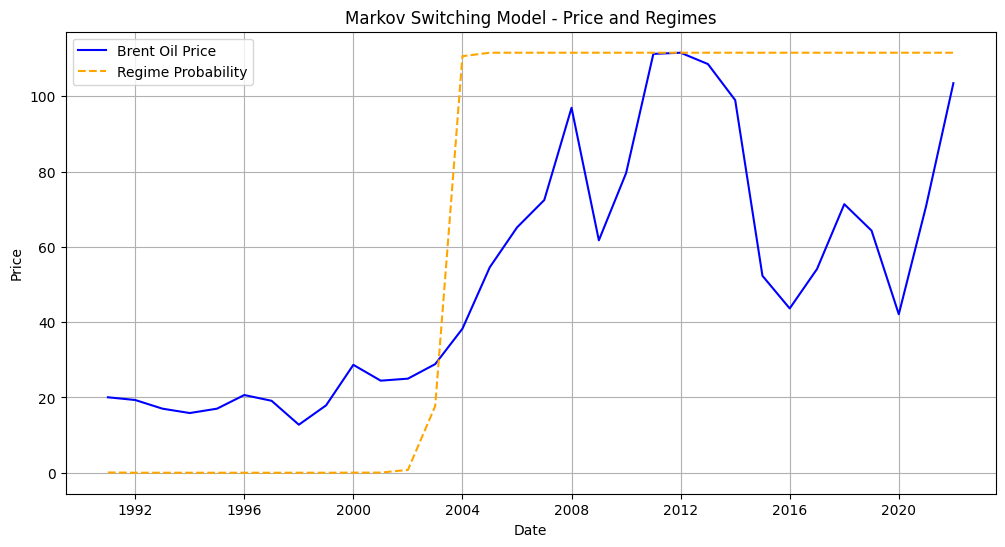

Attempting to forecast...


<ipython-input-22-1dea4805550a>:62: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(1), periods=steps, freq='Y')


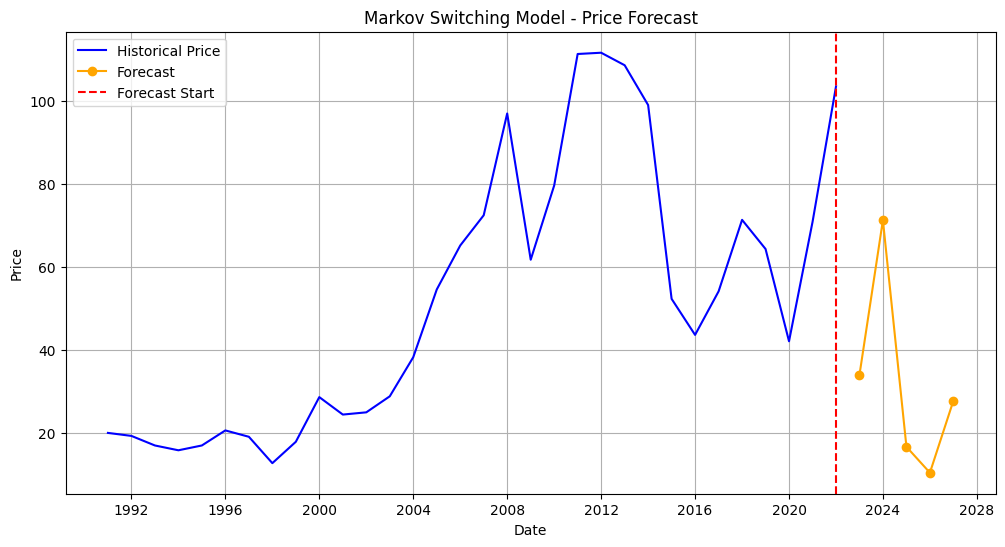

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

def fit_markov_switching_arima(df):
    """Fit a Markov Switching ARIMA model to the given DataFrame."""
    try:
        ms_model = MarkovRegression(df['Price'], k_regimes=2, trend='c', switching_variance=True)
        ms_result = ms_model.fit()
        print("Model fitting successful.")
        print(ms_result.summary())
        return ms_result
    except Exception as e:
        print(f"Error fitting Markov Switching ARIMA: {e}")
        raise

def plot_regimes(df, ms_result):
    """Plot the original price data and the inferred regimes from the Markov model."""
    df['Regime'] = ms_result.smoothed_marginal_probabilities[1]

    plt.figure(figsize=(12, 6))
    plt.plot(df['Price'], label='Brent Oil Price', color='blue')
    plt.plot(df['Regime'] * df['Price'].max(), label='Regime Probability', linestyle='--', color='orange')
    plt.title('Markov Switching Model - Price and Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

def forecast_markov_switching(ms_result, steps=5):
    """Forecast future values using the fitted Markov Switching model."""
    try:
        print("Attempting to forecast...")
        forecast_values = []

        last_price = ms_result.fittedvalues.iloc[-1]
        current_regime = np.argmax(ms_result.smoothed_marginal_probabilities.iloc[-1])

        for _ in range(steps):
            if current_regime == 0:
                last_price = ms_result.params['const[0]'] + np.sqrt(ms_result.params['sigma2[0]']) * np.random.randn()
            else:
                last_price = ms_result.params['const[1]'] + np.sqrt(ms_result.params['sigma2[1]']) * np.random.randn()

            forecast_values.append(last_price)
            current_regime = np.random.choice(
                [0, 1],
                p=[ms_result.params['p[0->0]'], 1 - ms_result.params['p[0->0]']]
            )

        return np.array(forecast_values)

    except Exception as e:
        print(f"Error forecasting: {e}")
        raise

def plot_forecast(df, forecast, steps):
    """Plot the historical data and forecasted values."""
    last_date = df.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.DateOffset(1), periods=steps, freq='Y')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Price'], label='Historical Price', color='blue')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='orange', marker='o')
    plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
    plt.title('Markov Switching Model - Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
try:
    # Ensure 'merged_data' is a DataFrame with a 'Price' column and a DateTime index
    if 'Price' not in merged_data.columns:
        raise ValueError("The merged_data DataFrame must contain a 'Price' column.")

    # Ensure the index is a DateTimeIndex
    if not isinstance(merged_data.index, pd.DatetimeIndex):
        merged_data.index = pd.to_datetime(merged_data.index.astype(str))

    print("Merged Data Head:")
    print(merged_data.head())
    print("Merged Data Index:")
    print(merged_data.index)

    ms_result = fit_markov_switching_arima(merged_data)
    plot_regimes(merged_data, ms_result)

    forecast = forecast_markov_switching(ms_result, steps=5)
    plot_forecast(merged_data, forecast, steps=5)

except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [ ]:
import statsmodels
print(statsmodels.__version__)

0.14.4


In [ ]:
!pip install tensorflow


Number of data points: 32
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3837
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2566
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2277
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1023 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0994 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1191 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0844 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1044 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0861 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0987 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0725 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0821 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0624 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0745 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0603 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

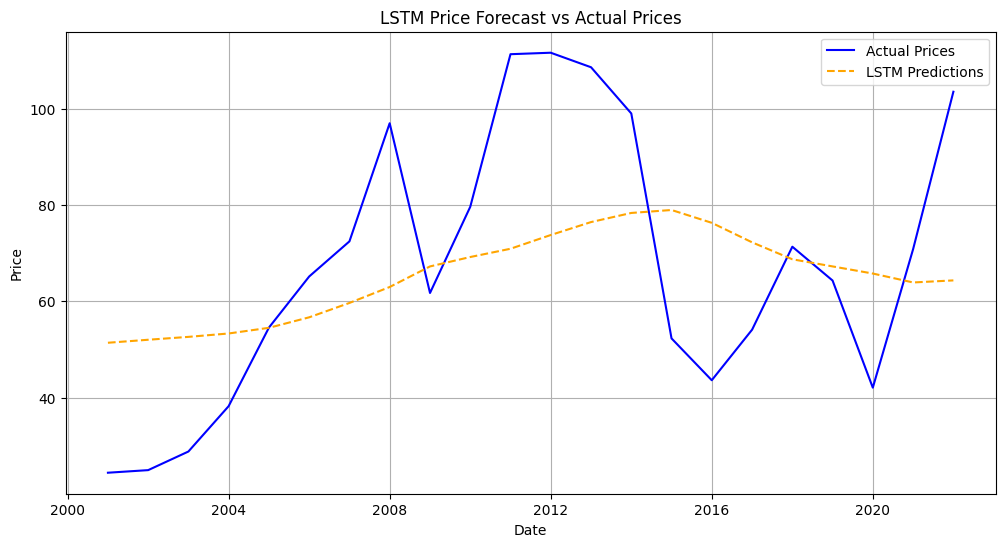

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

def scale_data(df):
    """Scale the price data using MinMaxScaler."""
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
    return scaled_data, scaler

def prepare_lstm_data(scaled_data, sequence_length=60):
    """Prepare the input data for LSTM."""
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)

    # Ensure X is 3D as required by LSTM
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

def build_and_train_lstm(X, y, epochs=10, batch_size=32):
    """Build and train the LSTM model."""
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    try:
        model.fit(X, y, epochs=epochs, batch_size=batch_size)
        print("LSTM model trained successfully.")
    except Exception as e:
        print(f"Error training LSTM model: {e}")
        raise

    return model

def forecast_lstm(model, X, scaler):
    """Forecast future prices using the trained LSTM model."""
    predictions = model.predict(X)
    return scaler.inverse_transform(predictions)

def plot_predictions(df, predictions):
    """Plot historical prices and LSTM predictions."""
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(predictions):], df['Price'].values[-len(predictions):], label='Actual Prices', color='blue')
    plt.plot(df.index[-len(predictions):], predictions, label='LSTM Predictions', color='orange', linestyle='--')
    plt.title('LSTM Price Forecast vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()



try:
    # Ensure df is a DataFrame with a 'Price' column and a DateTime index
    if 'Price' not in merged_data.columns:
        raise ValueError("The DataFrame must contain a 'Price' column.")

    # Ensure the index is a DateTimeIndex
    if not isinstance(merged_data.index, pd.DatetimeIndex):
        merged_data.index = pd.to_datetime(merged_data.index.astype(str))

    # Check the number of data points
    num_data_points = len(merged_data)
    print(f"Number of data points: {num_data_points}")

    # Set the sequence length to a smaller value
    sequence_length = min(10, num_data_points - 1)  # Set to 10 or smaller based on data points

    # Scale the data
    scaled_data, scaler = scale_data(merged_data)

    # Prepare LSTM data
    X, y = prepare_lstm_data(scaled_data, sequence_length=sequence_length)

    # Check if we have enough data to proceed
    if len(X) == 0:
        raise ValueError("Not enough data points to create sequences for LSTM.")

    # Build and train the LSTM model
    lstm_model = build_and_train_lstm(X, y, epochs=50, batch_size=8)  # Reduce batch size if needed

    # Forecast using the trained model
    predictions = forecast_lstm(lstm_model, X, scaler)

    # Plot the predictions against actual prices
    plot_predictions(merged_data, predictions)

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3707
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2273 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1960 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0984 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0536 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0455 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0599 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0547 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0326 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0411 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━

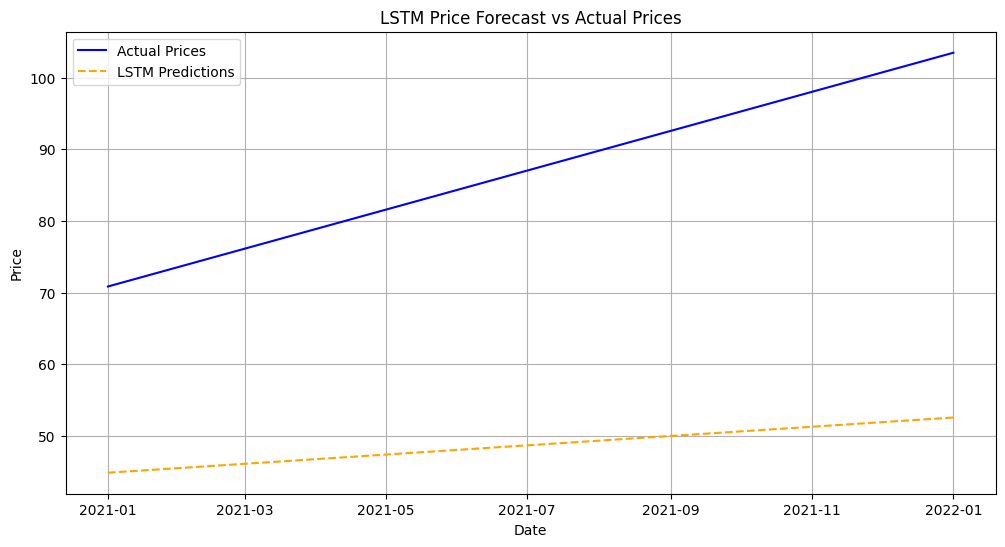

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5363
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4958
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4723
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4186
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4048
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3918
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3860
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3226
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2645
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3068
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2385
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2320
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2100
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2153
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1787
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Function to scale the price data using MinMaxScaler
def scale_data(df):
    """Scale the price data using MinMaxScaler."""
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
    return scaled_data, scaler

# Function to prepare the input data for LSTM
def prepare_lstm_data(scaled_data, sequence_length=5):
    """Prepare the input data for LSTM."""
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i, 0])  # Collect sequences
        y.append(scaled_data[i, 0])  # Collect the target
    X, y = np.array(X), np.array(y)

    # Reshape to 3D for LSTM
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)
    return X, y

# Function to build and train the LSTM model
def build_and_train_lstm(X, y, epochs=10, batch_size=4):
    """Build and train the LSTM model."""
    model = Sequential()
    model.add(Input(shape=(X.shape[1], 1)))  # Input layer
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)  # Train the model
    print("LSTM model trained successfully.")

    return model

# Function to forecast future prices using the trained LSTM model
def forecast_lstm(model, X, scaler):
    """Forecast future prices using the trained LSTM model."""
    predictions = model.predict(X)
    return scaler.inverse_transform(predictions)

# Function to plot historical prices and LSTM predictions
def plot_predictions(df, predictions):
    """Plot historical prices and LSTM predictions."""
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(predictions):], df['Price'].values[-len(predictions):], label='Actual Prices', color='blue')
    plt.plot(df.index[-len(predictions):], predictions, label='LSTM Predictions', color='orange', linestyle='--')
    plt.title('LSTM Price Forecast vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
try:
    # Ensure df is a DataFrame with a 'Price' column and a DateTime index
    if 'Price' not in merged_data.columns:
        raise ValueError("The DataFrame must contain a 'Price' column.")

    # Ensure the index is a DateTimeIndex
    if not isinstance(merged_data.index, pd.DatetimeIndex):
        merged_data.index = pd.to_datetime(merged_data.index.astype(str))

    # Split the data into training and testing sets
    train_size = int(len(merged_data) * 0.8)
    train_data = merged_data[:train_size]
    test_data = merged_data[train_size:]

    # Scale the training data
    scaled_train_data, scaler = scale_data(train_data)

    # Prepare training data
    X_train, y_train = prepare_lstm_data(scaled_train_data, sequence_length=5)

    # Build and train the model on the training set
    lstm_model = build_and_train_lstm(X_train, y_train, epochs=50, batch_size=4)

    # Scale the test data
    scaled_test_data, _ = scale_data(test_data)

    # Prepare the test data for predictions
    X_test, y_test = prepare_lstm_data(scaled_test_data, sequence_length=5)

    # Make predictions on the test set
    predictions = forecast_lstm(lstm_model, X_test, scaler)

    # Plot the predictions against the actual test prices
    plot_predictions(test_data, predictions)

    # Perform time series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)  # Adjust number of splits based on data availability
    errors = []

    for train_index, test_index in tscv.split(merged_data):
        train, test = merged_data.iloc[train_index], merged_data.iloc[test_index]

        # Scale and prepare data as before
        scaled_train, scaler = scale_data(train)
        X_train, y_train = prepare_lstm_data(scaled_train, sequence_length=5)

        # Train the model
        lstm_model = build_and_train_lstm(X_train, y_train, epochs=50, batch_size=4)

        # Scale the test data
        scaled_test, _ = scale_data(test)
        X_test, y_test = prepare_lstm_data(scaled_test, sequence_length=5)

        # Make predictions
        predictions = forecast_lstm(lstm_model, X_test, scaler)

        # Calculate error
        mse = mean_squared_error(y_test, predictions)
        errors.append(mse)

    # Average cross-validation error
    if errors:
        average_mse = np.mean(errors)
        print(f'Average MSE across cross-validation folds: {average_mse}')

except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [ ]:
merged_data.head()

,GDP per cap (annual %),inflation,Unemployr,exchange rate,Price,gdp_lagged,Regime
Date,,,,,,,
1991-01-01,-10.967014,35.722598,3.259,2.070000,20.041128,NaN,0.000651
1992-01-01,-12.314452,10.527444,3.382,2.802500,19.319728,-10.967014,0.000030
1993-01-01,9.398619,3.543066,3.236,5.000000,17.013413,-12.314452,0.000020
1994-01-01,-0.202451,7.593876,3.100,5.465000,15.856389,9.398619,0.000022
1995-01-01,2.699901,10.022173,3.021,6.158333,17.015850,-0.202451,0.000020
